In [1]:
#make sure plots are embedded into the notebook
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pywikibot as pwb
import pandas as pd
import networkx as nx

import pylab as pl

# Make plots prettyful
pl.style.use('fivethirtyeight')

import graphviz

VERBOSE:pywiki:Starting 1 threads...


Misspelled?
Please see https://www.mediawiki.org/wiki/Special:MyLanguage/Manual:Pywikibot/Windows
Defaulting to family='test' and mylang='test'.


In [18]:
langs = [
    ('en', 'English'), 
    ('de', 'German'),
    ('es', 'Spanish'),
    ('fr', 'French'),
    ('ja', 'Japanese'),
    ('ru', 'Russian'),
    ('it', 'Italian'),
    ('pt', 'Portuguese'),
    ('zh', 'Chinese'),
    ('nl', 'Dutch'),
    ('pl', 'Polish'),
    ('ar', 'Arabic'),
    ('tr', 'Turkish'),
    ('sv', 'Swedish'),
    ('ko', 'Korean'),
    ('fa', 'Persian'),
    ('uk', 'Ukrainian'),
    ('he', 'Hebrew'),
    ('id', 'Indonesian'),
    ('cs', 'Czech'),
]

lang_codes = [i[0] for i in langs]

In [3]:
cities = [
    u'Shanghai',
    u'Karachi',
    u'Lagos',
    u'Delhi',
    u'Istanbul',
    u'Tokyo',
    u'Tianjin',
    u'Guangzhou',
    u'Mumbai',
    u'Moscow',
    u'São Paulo',
    u'Beijing',
    u'Shenzhen',
    u'Seoul',
    u'Jakarta',
    u'Lahore',
    u'Kinshasa',
    u'Cairo',
    u'Mexico City',
    u'Lima',
    u'New York City',
    u'Bangalore',
    u'London',
    u'Bangkok',
    u'Dongguan',
    u'Chongqing',
    u'Nanjing',
    u'Tehran',
    u'Shenyang',
    u'Bogotá',
    u'Ho Chi Minh City',
    u'Ningbo',
    u'Hong Kong',
    u'Baghdad',
    u'Changsha',
    u'Dhaka',
    u'Wuhan',
    u'Hyderabad',
    u'Hanoi',
    u'Faisalabad',
    u'Rio de Janeiro',
    u'Foshan',
    u'Santiago',
    u'Riyadh',
    u'Ahmedabad',
    u'Singapore',
    u'Shantou',
    u'Yangon',
    u'Saint Petersburg',
    u'Ankara'
]

In [47]:
lang_lists = dict((i,[]) for i in lang_codes)

count = 0

for city in cities:
    page = pwb.Page(site,city)
    for link in page.iterlanglinks():
        if link.site.code in lang_codes:
            lang_lists[link.site.code].append(link.title)

    count += 1
    for key,value in lang_lists.iteritems():
        if len(value) < count:
            value.append(None)

In [48]:
lang_lists['en'] = cities

In [49]:
df = pd.DataFrame(lang_lists)

In [50]:
df.index = cities

In [51]:
df

ar                  cs                  de  \
Shanghai                   شانغهاي             Šanghaj            Shanghai   
Karachi                     كراتشي              Karáčí           Karatschi   
Lagos                        لاغوس               Lagos               Lagos   
Delhi                         دلهي               Dillí               Delhi   
Istanbul                   إسطنبول            Istanbul            Istanbul   
Tokyo                        طوكيو    Prefektura Tokio     Präfektur Tokio   
Tianjin                    تيانجين          Tchien-ťin             Tianjin   
Guangzhou                  قوانتشو       Kanton (Čína)           Guangzhou   
Mumbai                      مومباي              Bombaj              Mumbai   
Moscow                       موسكو              Moskva              Moskau   
São Paulo                ساو باولو           São Paulo           São Paulo   
Beijing                       بكين              Peking              Peking   
Shenzhen              شنجن (الصين)             Šen-čen            Shenzhen   
Seoul                          سول                Soul               Seoul   
Jakarta                     جاكرتا             Jakarta             Jakarta   
Lahore                       لاهور              Láhaur              Lahore   
Kinshasa                   كينشاسا            Kinshasa            Kinshasa   
Cairo                      القاهرة              Káhira               Kairo   
Mexico City           مدينة مكسيكو    Ciudad de México        Mexiko-Stadt   
Lima                          ليما                Lima                Lima   
New York City              نيويورك            New York       New York City   
Bangalore                  بنغالور           Bengalúru           Bangalore   
London                        لندن              Londýn              London   
Bangkok                     بانكوك             Bangkok             Bangkok   
Dongguan                  دونغقوان           Tung-kuan            Dongguan   
Chongqing               تشونغتشينغ       Čchung-čching           Chongqing   
Nanjing                    نانجينغ             Nanking             Nanjing   
Tehran                       طهران             Teherán             Teheran   
Shenyang                    شنيانغ            Šen-jang            Shenyang   
Bogotá                      بوغوتا              Bogotá              Bogotá   
Ho Chi Minh City  مدينة هو تشي منه  Ho Či Minovo Město   Ho-Chi-Minh-Stadt   
Ningbo                      نينغبو             Ning-po              Ningbo   
Hong Kong                هونغ كونغ            Hongkong            Hongkong   
Baghdad                      بغداد              Bagdád              Bagdad   
Changsha                   تشانغشا           Čchang-ša            Changsha   
Dhaka                          دكا               Dháka               Dhaka   
Wuhan                        ووهان             Wu-chan               Wuhan   
Hyderabad                حيدر آباد          Hajdarábád  Hyderabad (Indien)   
Hanoi                        هانوي               Hanoj               Hanoi   
Faisalabad               فيصل آباد                None          Faisalabad   
Rio de Janeiro       ريو دي جانيرو      Rio de Janeiro      Rio de Janeiro   
Foshan                       فوشان              Fo-šan              Foshan   
Santiago                  سانتياغو   Santiago de Chile   Santiago de Chile   
Riyadh                      الرياض               Rijád                Riad   
Ahmedabad                أحمد آباد           Ahmadábád           Ahmedabad   
Singapore                 سنغافورة            Singapur            Singapur   
Shantou                      شانتو           Šan-tchou             Shantou   
Yangon                      يانغون              Rangún              Rangun   
Saint Petersburg      سانت بطرسبرغ           Petrohrad    Sankt Petersburg   
Ankara                       أنقرة              Ankara              Ankara   

                                en                  e

In [52]:
df.to_csv('cities.csv', encoding='utf-8')

In [144]:
en = nx.DiGraph()

In [145]:
for city in cities:
    page = pwb.Page(site, city)
    for p in page.linkedPages():
        en.add_edge(city, p.title())

VERBOSE:pywiki:Found 1 wikipedia:en processes running, including this one.


197 1108


In [146]:
print len(en), en.size()

30699 55113


In [154]:
a = 20
b = 20
subgraph = en.subgraph([i for i in en.nodes() if en.degree(i) > a])
labels=dict([(i,i if subgraph.degree(i) > b else '') for i in subgraph.nodes()])
node_size=np.array([subgraph.degree(i) for i in subgraph.nodes()])*10
node_color = ['#66ff99' if subgraph.degree(i) > 50 else '#ff6666' for i in subgraph.nodes()]
print len(subgraph)

144


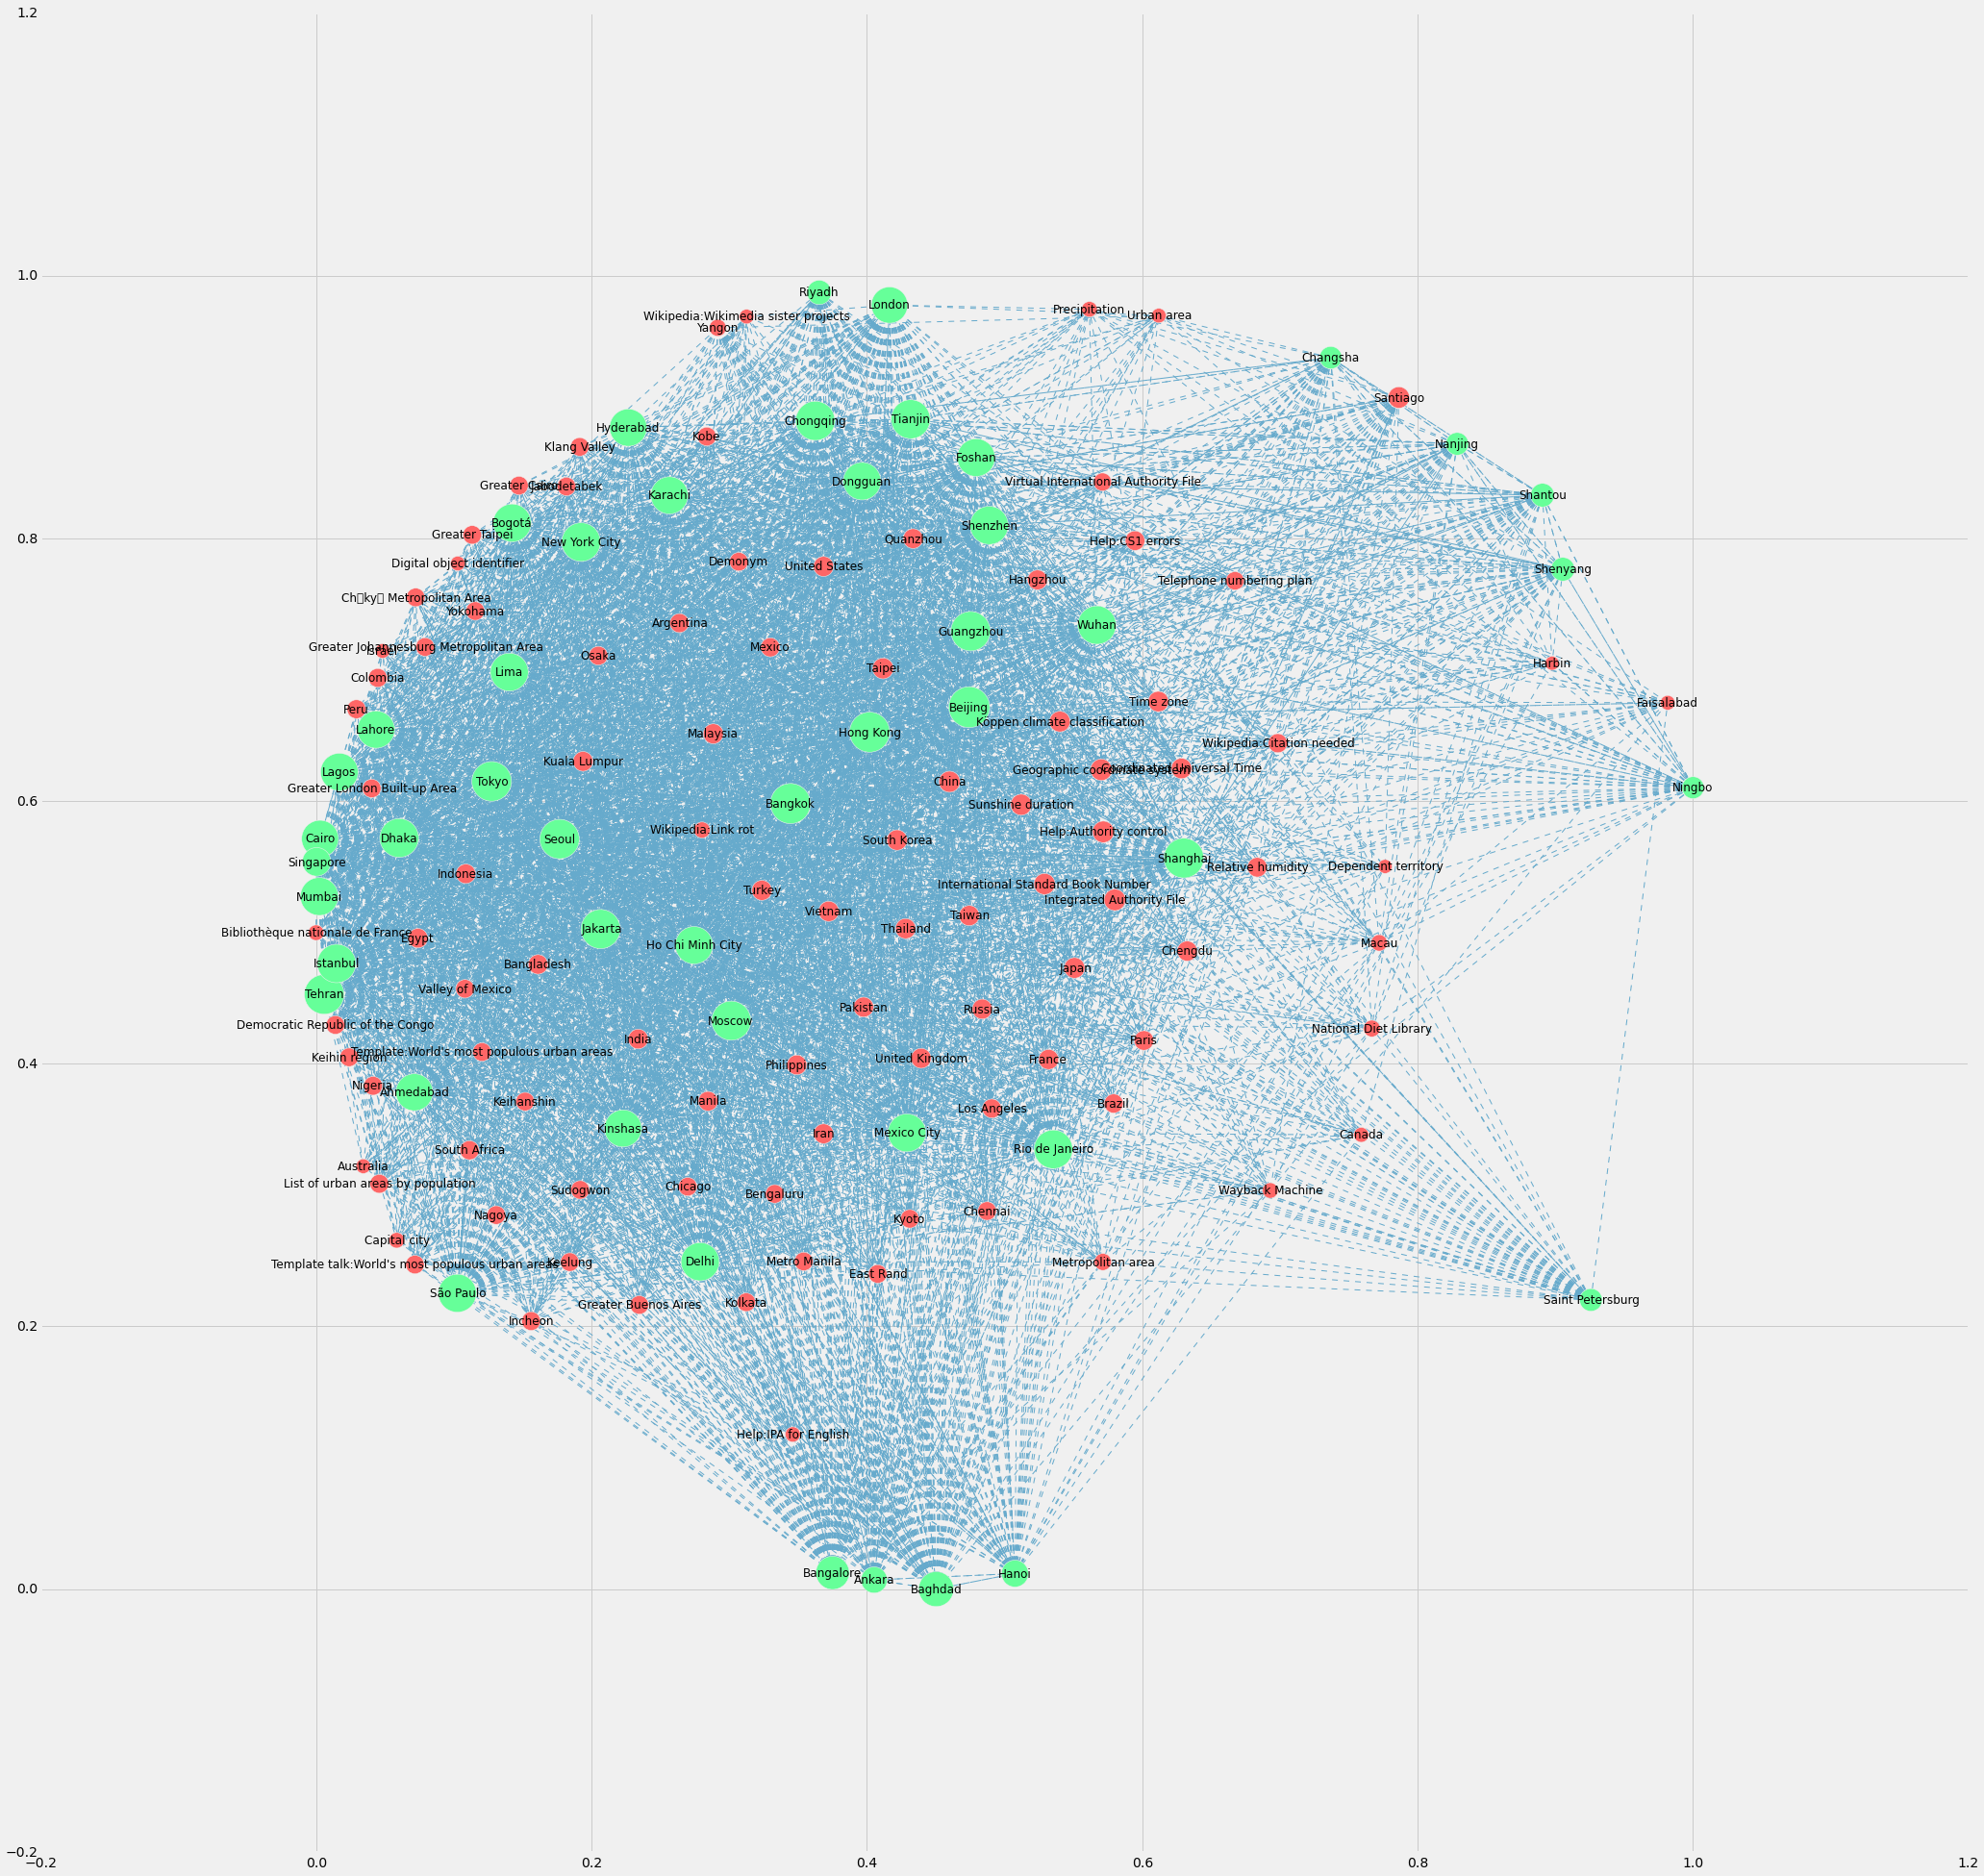

In [155]:
figure, ax = pl.subplots(figsize=(32,32))
nx.draw_networkx(
    subgraph,
    ax=ax,
    #pos=nx.graphviz_layout(subgraph),
    #pos=nx.random_layout(subgraph),
    pos=nx.spring_layout(subgraph, k=.3),
    edge_color='#66aacc',
    style='dashed',
    node_size=node_size,
    node_color=node_color,
    #nodelist=[i for i in en.nodes() if en.degree(i) > 1]
    arrows=False,
    labels=labels
)

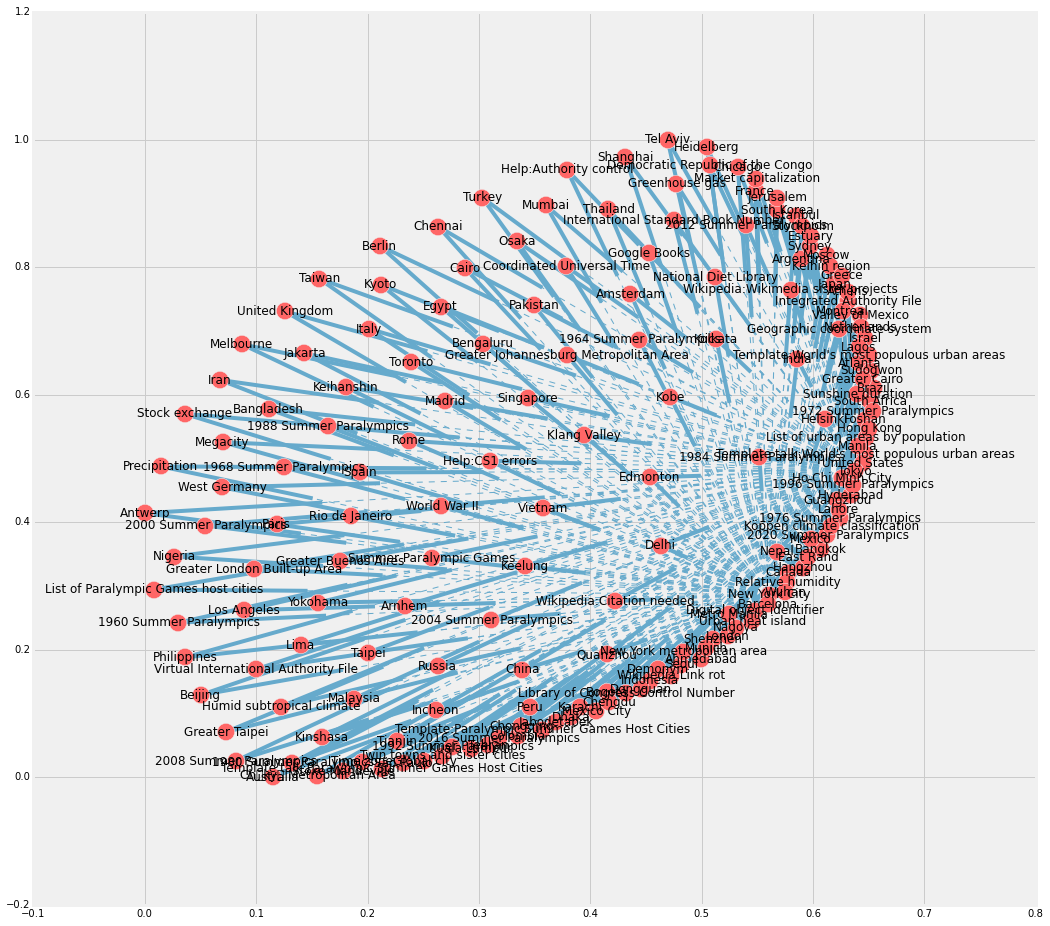

In [86]:
figure, ax = pl.subplots(figsize=(16,16))
nx.draw_networkx(
    subgraph,
    ax=ax,
    pos=nx.spring_layout(subgraph, k=.13),
    edge_color='#66aacc',
    style='dashed',
    #node_size=np.array(G.degree().values())*30,
    node_color='#ff6666',
    #nodelist=[i for i in en.nodes() if en.degree(i) > 1]
)

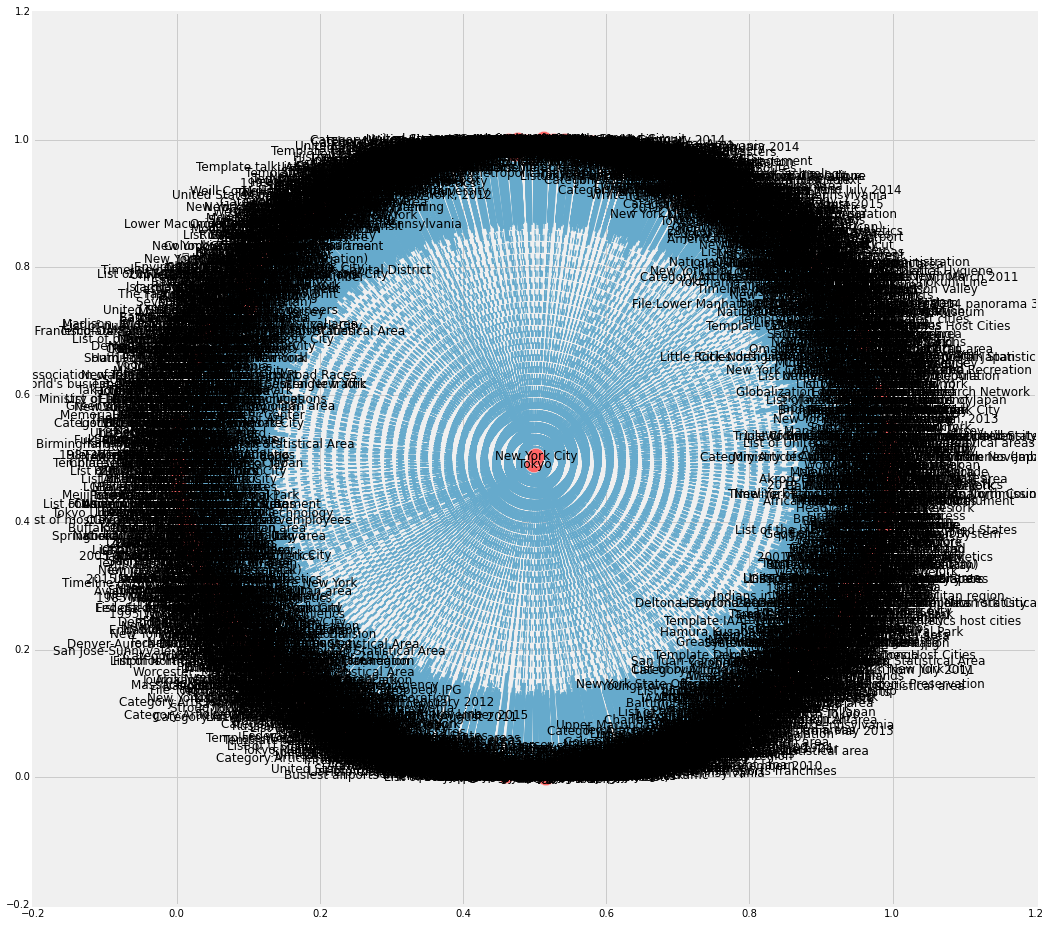

In [80]:

figure, ax = pl.subplots(figsize=(16,16))
nx.draw_networkx(
    en,
    ax=ax,
    pos=nx.spring_layout(en, k=.13),
    edge_color='#66aacc',
    style='dashed',
    #node_size=np.array(G.degree().values())*30,
    node_color='#ff6666',
    nodelist=[i for i in en.nodes() if en.degree(i) > 1]
)

  if self._edgecolors == str('face'):

  if self._edgecolors == str('face'):



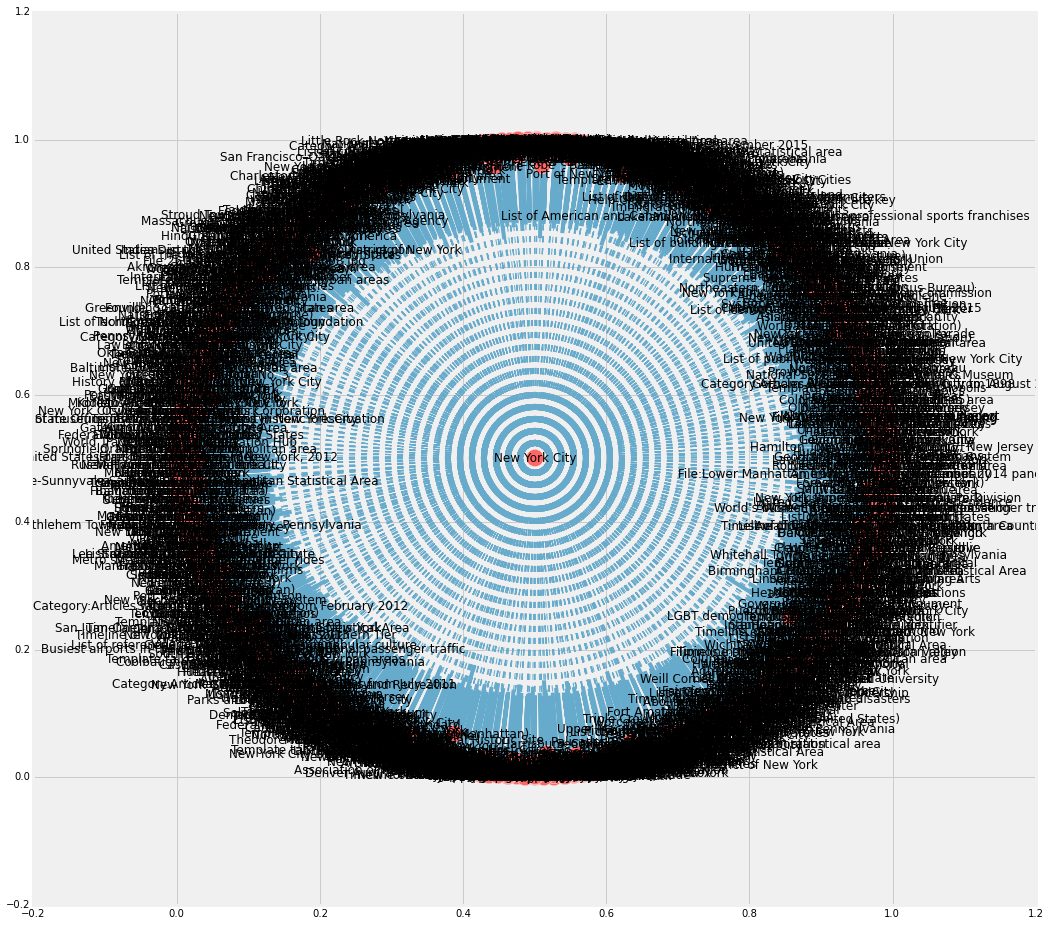

In [68]:
figure, ax = pl.subplots(figsize=(16,16))
nx.draw_networkx(
    en,
    ax=ax,
    pos=nx.spring_layout(en, k=.13),
    edge_color='#66aacc',
    style='dashed',
    #node_size=np.array(G.degree().values())*30,
    node_color='#ff6666'
)

In [157]:
nx.write_gml(en,'en.gml',stringizer=lambda x: '')

TypeError: write_gml() got an unexpected keyword argument 'stringizer'

In [162]:
for l in nx.generate_gml(en):
    print l

graph [
  directed 1
  node [
    id 0
    label "International Court of Justice"
  ]
  node [
    id 1


UnicodeEncodeError: 'ascii' codec can't encode character u'\u2013' in position 7: ordinal not in range(128)

In [178]:
import codecs
encoder = codecs.getincrementalencoder('utf-8')()

q = en.subgraph([u'Beijing\u2013Hankou Railway'])
#en.nodes(True)[1]
#q2 = nx.relabel_nodes(q, {u'Beijing\u2013Hankou Railway': u'Beijing\u2013Hankou Railway'.encode('utf-8').decode('utf-8')})
q2 = nx.relabel_nodes(q, {u'Beijing\u2013Hankou Railway': encoder.encode(u'Beijing\u2013Hankou Railway'.encode('utf-8').decode('utf-8'))})
print q2.nodes()
list(nx.generate_gml(q2))

['Beijing\xe2\x80\x93Hankou Railway']


UnicodeDecodeError: 'ascii' codec can't decode byte 0xe2 in position 7: ordinal not in range(128)

In [170]:
u'Beijing\u2013Hankou Railway'.encode('utf-8')

'Beijing\xe2\x80\x93Hankou Railway'

In [173]:
print u'Beijing\u2013Hankou Railway'

Beijing–Hankou Railway


In [183]:
nx.write_gpickle(en,'en.pickle')

In [4]:
# Queue to process pages
# Keep tuples of (title,depth)
# Where depth is the current depth, don't go past depth
queue = []
queued = {}

def scrapeCity(graph,lang,city,cities,max_depth=3):
    if max_depth < 1:
        return
    
    site = pwb.Site(lang, 'wikipedia')
    
    queue.append((pwb.Page(site, city),0))
    queued[city] = None
    
    while queue:
        page, depth = queue.pop()
        title = page.title()
        
        #if depth < max_depth:
        for p in page.linkedPages():
            t = p.title()

            graph.add_edge(title,t)

            # If we haven't queued/processed the page yet
            # And it isn't one of the cities.
            if t not in queued and t not in cities:
                if depth < (max_depth - 1):
                    queued[t] = None
                    queue.append((pwb.Page(site,t), depth+1))
                

In [5]:
en = nx.DiGraph()

In [6]:
scrapeCity(en, 'en', 'New York City', cities, max_depth=2)

VERBOSE:pywiki:Found 1 wikipedia:en processes running, including this one.
VERBOSE:pywiki:Found 1 wikipedia:en processes running, including this one.
VERBOSE:pywiki:Found 1 wikipedia:en processes running, including this one.
VERBOSE:pywiki:Found 1 wikipedia:en processes running, including this one.
VERBOSE:pywiki:Pausing due to database lag: Waiting for 10.64.32.23: 7 seconds lagged
Sleeping for 5.0 seconds, 2015-12-08 15:42:24
INFO:pywiki:Sleeping for 5.0 seconds, 2015-12-08 15:42:24
VERBOSE:pywiki:Pausing due to database lag: Waiting for 10.64.48.20: 9 seconds lagged
Sleeping for 5.0 seconds, 2015-12-08 15:42:29
INFO:pywiki:Sleeping for 5.0 seconds, 2015-12-08 15:42:29
VERBOSE:pywiki:Pausing due to database lag: Waiting for 10.64.32.21: 12 seconds lagged
Sleeping for 6.0 seconds, 2015-12-08 15:42:34
INFO:pywiki:Sleeping for 6.0 seconds, 2015-12-08 15:42:34
VERBOSE:pywiki:Found 1 wikipedia:en processes running, including this one.


In [7]:
print len(en), en.size()

290419 791068


In [8]:
nx.write_gpickle(en,'ennyc2.pickle')

In [12]:
d = en.degree()

In [15]:
import operator
sorted_d = sorted(d.items(), key=operator.itemgetter(1))

In [23]:
sorted_d[-100:][::-1]

[(u'New York City', 3037),
 (u'United States', 2625),
 (u'Russia', 2592),
 (u'France', 2286),
 (u'England', 2249),
 (u'New York metropolitan area', 2242),
 (u'United Kingdom', 2213),
 (u'Paris', 2155),
 (u'Massachusetts', 2152),
 (u'Chicago', 2142),
 (u'Netherlands', 2089),
 (u'Pakistan', 2080),
 (u'New York', 2073),
 (u'Italy', 2002),
 (u'China', 2000),
 (u'Manhattan', 1998),
 (u'New Jersey', 1982),
 (u'Pittsburgh', 1977),
 (u'Jerusalem', 1937),
 (u'Philippines', 1923),
 (u'Spain', 1897),
 (u'Ridge-and-Valley Appalachians', 1896),
 (u'Pittsburgh metropolitan area', 1893),
 (u'Rome', 1871),
 (u'Barack Obama', 1863),
 (u'Timeline of New York City', 1839),
 (u'Turkey', 1814),
 (u'Philadelphia', 1806),
 (u'Slavery', 1805),
 (u'Washington, D.C.', 1799),
 (u'Athens', 1781),
 (u'List of museums in New York', 1762),
 (u'Argentina', 1762),
 (u'Madrid', 1753),
 (u'Chennai', 1718),
 (u'Franklin D. Roosevelt', 1697),
 (u'Los Angeles', 1694),
 (u'Iceland', 1692),
 (u'World War II', 1688),
 (u'San 

In [22]:
cities[:25]

[u'Shanghai',
 u'Karachi',
 u'Lagos',
 u'Delhi',
 u'Istanbul',
 u'Tokyo',
 u'Tianjin',
 u'Guangzhou',
 u'Mumbai',
 u'Moscow',
 u'S\xe3o Paulo',
 u'Beijing',
 u'Shenzhen',
 u'Seoul',
 u'Jakarta',
 u'Lahore',
 u'Kinshasa',
 u'Cairo',
 u'Mexico City',
 u'Lima',
 u'New York City',
 u'Bangalore',
 u'London',
 u'Bangkok',
 u'Dongguan']

In [26]:
c = nx.betweenness_centrality(en, 100)

In [29]:
import operator
sorted_c = sorted(c.items(), key=operator.itemgetter(1))

In [33]:
sorted_c[-1]

(u'Stern School of Business', 0.0)

In [35]:
c = nx.eigenvector_centrality_numpy(en)

In [38]:
sorted_c = sorted(c.items(), key=operator.itemgetter(1))

In [40]:
sorted_c[0]

(u'Portolan', 5.074691090841797e-06)